In [5]:
import os
import cv2
import json
import numpy as np
from matplotlib import pyplot as plt

In [32]:
def generate_mask(image_shape, coordinates):
    # Create a mask with the same dimensions as the image
    mask = np.zeros(image_shape[:2], dtype=np.uint8)
    
    # Fill the mask with the iris coordinates
    if coordinates:
        cv2.fillPoly(mask, [np.array(coordinates, dtype=np.int32)], 255)
    
    return mask

In [40]:
#Apply Mask
def apply_mask_to_image(image, mask):
    # Apply the mask to the image
    masked_image = cv2.bitwise_and(image, image, mask=mask)
    return masked_image

[(231, 215), (233, 203), (237, 193), (260, 182), (280, 174), (299, 169), (316, 167), (334, 166), (358, 167), (375, 168), (387, 172), (396, 180), (406, 192), (412, 203), (414, 212), (416, 225), (416, 240), (415, 255), (408, 274), (398, 288), (384, 302), (365, 317), (351, 323), (336, 326), (319, 326), (301, 323), (284, 316), (267, 305), (253, 293), (244, 278), (236, 261), (232, 246), (231, 225)]


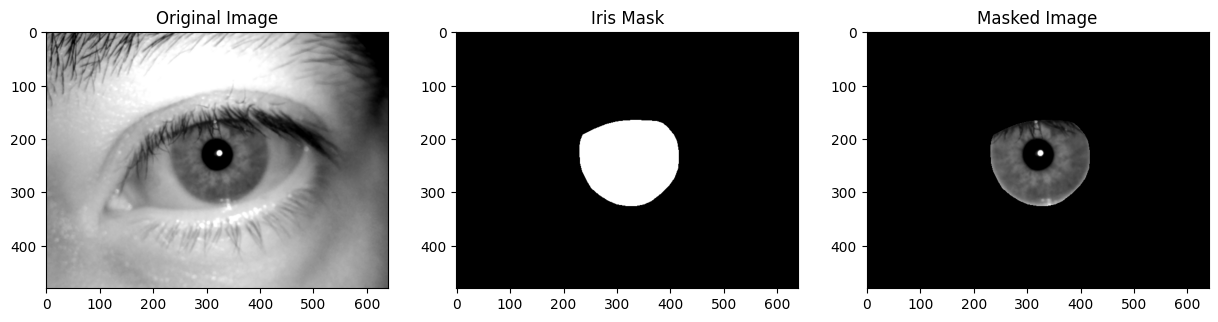

In [42]:
image_path = "segmentation/E_0_0_0_L_M_N_N_1981_0_2017.bmp"
image = cv2.imread(image_path)

segments = {}

json_file_path = "segmentation/via_region_data.json"
with open(json_file_path, 'r') as jsonfile:
    json_data = json.load(jsonfile)
    for img in json_data:
        val = json_data[img]
        regions = val['regions']
        for region in regions:
            shape_attributes = region.get('shape_attributes', {})
            region_attributes = region.get('region_attributes', {})
            
            if region_attributes.get('Eye') == 'iris':
                x_points = shape_attributes.get('all_points_x', [])
                y_points = shape_attributes.get('all_points_y', [])
                segments[val['filename']] = list(zip(x_points, y_points))

key = os.path.basename(image_path)
if key in segments:
    image_json = segments[key]
    mask = generate_mask(image.shape, image_json)
    masked_image = apply_mask_to_image(image, mask)
    print(image_json)
else:
    print("Image field not found")
    mask = np.zeros(image.shape[:2], dtype=np.uint8)
    masked_image = image

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(mask, cmap='gray')
plt.title('Iris Mask')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
plt.title('Masked Image')

plt.show()



In [48]:
import os
import json
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_json_data(json_file_path):
    with open(json_file_path, 'r') as jsonfile:
        return json.load(jsonfile)

def extract_segments(json_data):
    segments = {}
    for img in json_data:
        val = json_data[img]
        regions = val['regions']
        for region in regions:
            shape_attributes = region.get('shape_attributes', {})
            region_attributes = region.get('region_attributes', {})
            
            if region_attributes.get('Eye') == 'iris':
                x_points = shape_attributes.get('all_points_x', [])
                y_points = shape_attributes.get('all_points_y', [])
                segments[val['filename']] = list(zip(x_points, y_points))
    return segments

def traverse_data_folder(data_folder):
    all_segments = {}
    for root, _, files in os.walk(data_folder):
        for file in files:
            if file.endswith('.json'):
                json_file_path = os.path.join(root, file)
                json_data = load_json_data(json_file_path)
                segments = extract_segments(json_data)
                all_segments.update(segments)
    return all_segments

def generate_mask(image_shape, coordinates):
    mask = np.zeros(image_shape[:2], dtype=np.uint8)
    if coordinates:
        cv2.fillPoly(mask, [np.array(coordinates, dtype=np.int32)], 255)
    return mask

def apply_mask_to_image(image, mask):
    return cv2.bitwise_and(image, image, mask=mask)

def display_images(image, mask, masked_image):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.subplot(1, 3, 2)
    plt.imshow(mask, cmap='gray')
    plt.title('Iris Mask')
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
    plt.title('Masked Image')
    plt.show()

# Main code
data_folder = "data"
all_segments = traverse_data_folder(data_folder)


# Example usage with a specific image
# image_path = "segmentation/E_0_0_0_L_M_N_N_1981_0_2017.bmp"
# image = cv2.imread(image_path)
# key = os.path.basename(image_path)


# if key in all_segments:
#     iris_coordinates = all_segments[key]
#     mask = generate_mask(image.shape, iris_coordinates)
#     masked_image = apply_mask_to_image(image, mask)
#     display_images(image, mask, masked_image)
# else:
#     print("Image field not found")

{'E_0_2_2_L_M_N_N_1976_0_2017.bmp': [(216, 127), (197, 156), (189, 187), (196, 227), (218, 266), (247, 298), (283, 309), (333, 315), (353, 316), (387, 299), (423, 271), (440, 241), (450, 207), (451, 175), (437, 144), (419, 131), (381, 118), (359, 113), (321, 109), (277, 109), (243, 114)], 'E_0_2_2_R_M_N_N_1976_0_2017.bmp': [(236, 125), (211, 145), (199, 180), (200, 211), (213, 255), (242, 293), (287, 315), (314, 319), (343, 318), (373, 315), (401, 303), (429, 269), (451, 221), (450, 169), (436, 141), (417, 123), (367, 110), (311, 108), (276, 111), (256, 115)], 'E_0_2_2_L_M_N_N_1976_1_2017.bmp': [(202, 158), (187, 187), (184, 223), (192, 255), (211, 287), (234, 318), (256, 326), (311, 334), (355, 335), (388, 324), (417, 298), (438, 267), (447, 233), (445, 194), (436, 167), (400, 151), (356, 139), (309, 133), (267, 135), (227, 143)], 'E_0_2_2_L_M_N_N_1976_3_2017.bmp': [(211, 174), (201, 198), (193, 223), (194, 256), (213, 291), (230, 317), (260, 327), (304, 336), (353, 338), (391, 339), 